In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, multilabel_confusion_matrix
from sklearn import tree
import graphviz

In [2]:
df = pd.read_csv('Data_Iris/IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Ukuran data 150 baris dengan 5 kolom

In [3]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [4]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Deksripsi diatas menyatakan bahwa data yang dimiliki bersifat balanced-data (data seimbang)

# Persebaran Data Petal VS Sepal

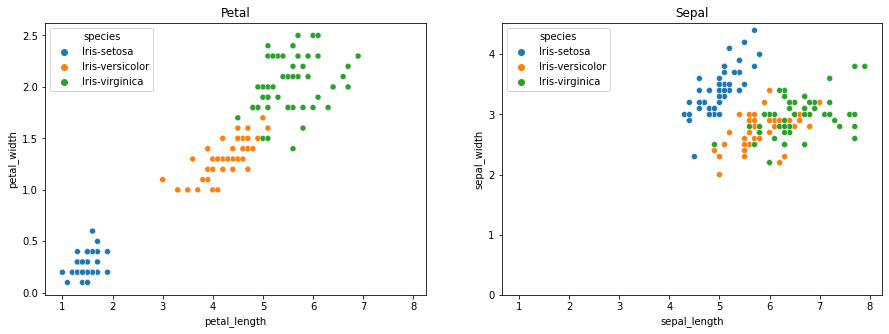

In [5]:
fig, axes = plt.subplots(1,2, figsize=(15,5), sharex = True)

axes[0].set_title('Petal')
sns.scatterplot(data = df, x = 'petal_length', y = 'petal_width', hue = 'species', ax = axes[0])

axes[1].set_title('Sepal')
sns.scatterplot(data = df, x = 'sepal_length', y = 'sepal_width', hue = 'species',  ax = axes[1])

plt.ylim(0)
plt.show()

Dari 2 grafik diatas dapat dikatakan bahwa :

1. Iris-Sentosa terpisah secara linear baik petal maupun sepal
2. Sepal memiliki overlap (tumpang-tindih) yang paling besar

C:\Users\adiba\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


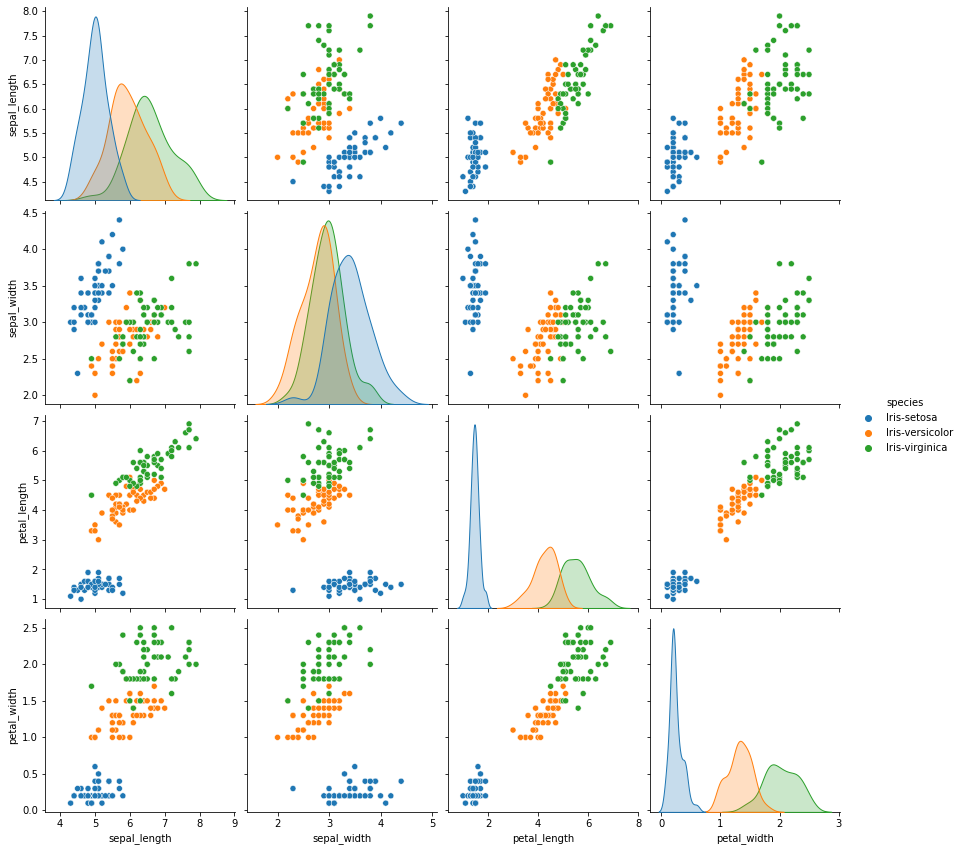

In [6]:
sns.pairplot(df, hue = 'species', size = 3)
plt.show()

1. Grafik Scatter menjelaskan hubugan antar kolom
2. Sedangkan Grafik Bar Cruve menunjukkan peluang-peluang pada kolom

In [7]:
print('Total data Nan :\n{}\n'.format(df.isna().sum()))
print('Total data Null :\n{}'.format(df.isnull().sum()))

Total data Nan :
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Total data Null :
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Dapat dikatakan dari statistik diatas, data ini:

    1. Nilai mean tidak melebihi 6
    2. Nilai min terkecil adalah 0.1
    3. Nilai max tebesar adalah 7.90

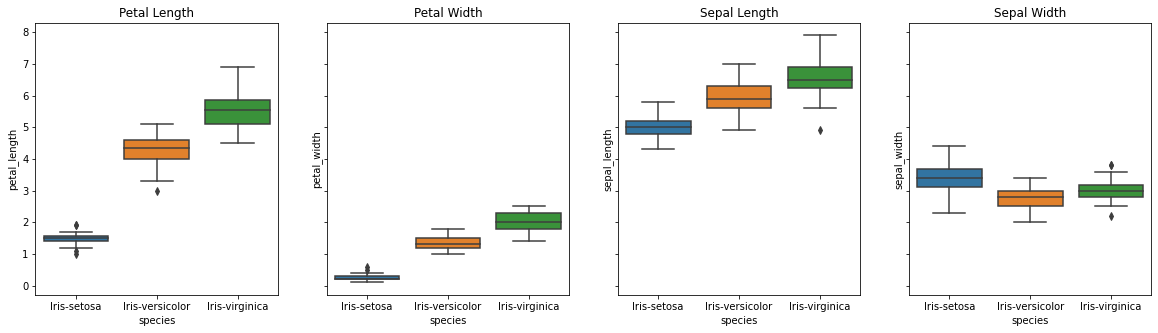

In [9]:
fig, axes = plt.subplots(1,4, figsize=(20,5), sharey = True)

axes[0].set_title('Petal Length')
sns.boxplot(data = df, x = "species", y = 'petal_length', ax = axes[0])

axes[1].set_title('Petal Width')
sns.boxplot(data = df, x = "species", y = 'petal_width',  ax = axes[1])

axes[2].set_title('Sepal Length')
sns.boxplot(data = df, x = "species", y = 'sepal_length', ax = axes[2])

axes[3].set_title('Sepal Width')
sns.boxplot(data = df, x = "species", y = 'sepal_width',  ax = axes[3])

plt.show()

# Split Data

In [10]:
y = df.pop('species') #Memisahkan kolom independent

# Decision Tree

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 1)

In [12]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3
69,5.6,2.5,3.9,1.1
128,6.4,2.8,5.6,2.1
114,5.8,2.8,5.1,2.4


In [13]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [14]:
y_train.head()

91     Iris-versicolor
135     Iris-virginica
69     Iris-versicolor
128     Iris-virginica
114     Iris-virginica
Name: species, dtype: object

In [15]:
y_test.head()

14         Iris-setosa
98     Iris-versicolor
75     Iris-versicolor
16         Iris-setosa
131     Iris-virginica
Name: species, dtype: object

# Support Vector Machine (SVM)

Disini akan dimulai melakukan encode pada label independent (kolom 'species' dari variable 'y' yang bersisi 'species') yang akan diubah 0 (Sentosa), 1 (Versicolor), dan 2 (Virginia)

In [16]:
y_svm = y

In [17]:
y_svm.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
y_svm = y_svm.replace({
    'Iris-setosa' : 0, 
    'Iris-versicolor' : 1, 
    'Iris-virginica' : 2
})

In [19]:
y_svm

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [20]:
X_train, X_test, y_svm_train, y_svm_test = train_test_split(df, y_svm, test_size = 0.2, random_state = 1)

In [21]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3
69,5.6,2.5,3.9,1.1
128,6.4,2.8,5.6,2.1
114,5.8,2.8,5.1,2.4


In [22]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [23]:
y_svm_train.head()

91     1
135    2
69     1
128    2
114    2
Name: species, dtype: int64

In [24]:
y_svm_test.head()

14     0
98     1
75     1
16     0
131    2
Name: species, dtype: int64

# Create Model

# Decision Tree 

In [25]:
model = DecisionTreeClassifier()

In [26]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

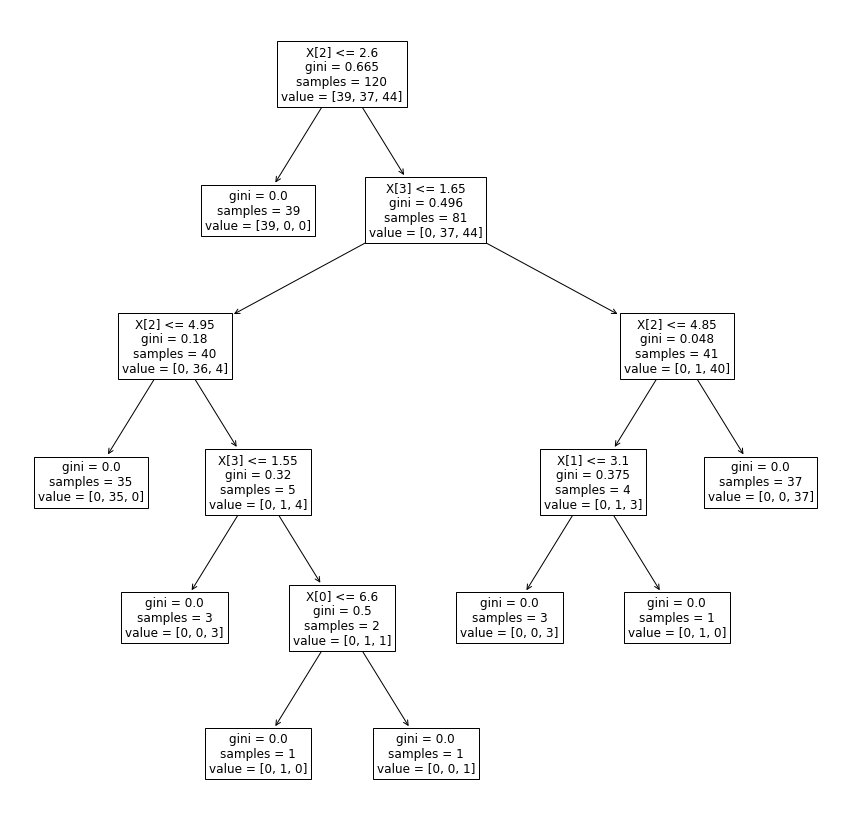

In [27]:
plt.figure(figsize=(15,15))
tree.plot_tree(model, fontsize = 12)
plt.show()

Anda bisa mengubah nilai-nilai diatas dengan menambahkan parameter pada model DecisionTreeClassifier() dari library sklearn

# Support Vector Machine

In [28]:
model_svm = SVC(kernel = 'linear', random_state = 3)

In [29]:
model_svm.fit(X_train, y_svm_train)

SVC(kernel='linear', random_state=3)

# Prediction & Evalution Model

In [30]:
prediksi_train = model.predict(X_train)
acc_train = accuracy_score(prediksi_train, y_train)
print('Acc score = {}'.format(acc_train))

Acc score = 1.0


In [31]:
prediksi_test = model.predict(X_test)
acc_test = accuracy_score(prediksi_test, y_test)
print('Acc score = {}'.format(acc_test))

Acc score = 0.9666666666666667


In [32]:
cm_train = confusion_matrix(y_train, prediksi_train)
cm_test = confusion_matrix(prediksi_test, y_test)

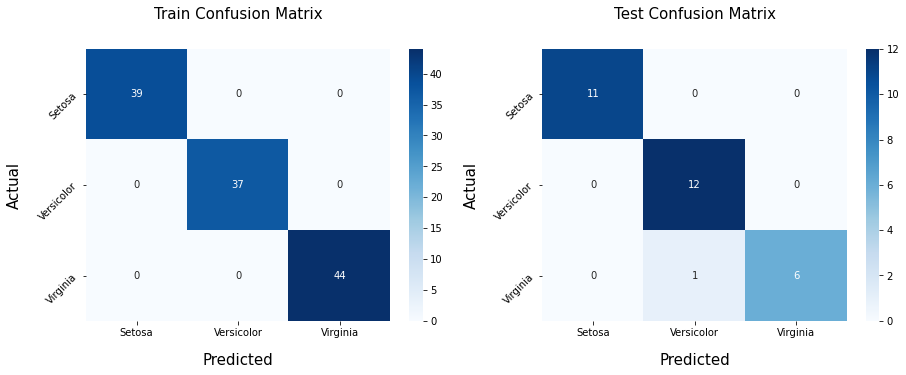

In [33]:
figure, axes = plt.subplots(1,2, figsize=(15,5), sharex = True)

axes[0].set_title('Train Confusion Matrix', fontsize = 15, pad = 30)
ax = sns.heatmap(cm_train, annot = True, cmap = 'Blues', ax = axes[0])
ax.xaxis.set_ticklabels(['Setosa', 'Versicolor', 'Virginia'])
ax.yaxis.set_ticklabels(['Setosa', 'Versicolor', 'Virginia'], rotation = 45)
ax.set_xlabel('Predicted', fontsize = 15, labelpad = 15)
ax.set_ylabel('Actual', fontsize = 15, labelpad = 15)


axes[1].set_title('Test Confusion Matrix', fontsize = 15, pad = 30)
ax_test = sns.heatmap(cm_test, annot = True, cmap = 'Blues', ax = axes[1])
ax_test.xaxis.set_ticklabels(['Setosa', 'Versicolor', 'Virginia'])
ax_test.yaxis.set_ticklabels(['Setosa', 'Versicolor', 'Virginia'], rotation = 45)
ax_test.set_xlabel('Predicted', fontsize = 15, labelpad = 15)
ax_test.set_ylabel('Actual', fontsize = 15, labelpad = 15)


plt.show()

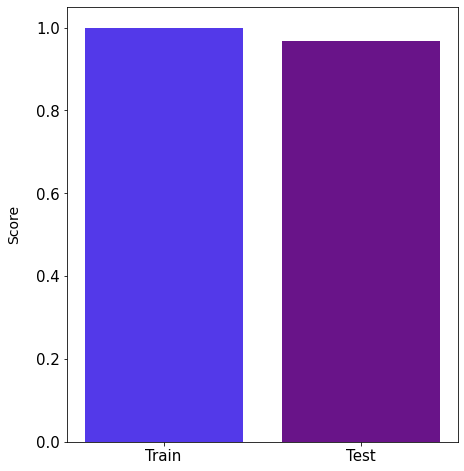

In [34]:
figure = plt.figure(figsize=(7,8))
plt.bar(['Train', 'Test'], [acc_train, acc_test], color = np.random.rand(3,3))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Score', labelpad = 15, fontsize = 14)
plt.show()

# Support Vector Machine (SVM)

In [35]:
prediksi_train_svm = model_svm.predict(X_train)
acc_train_svm = accuracy_score(prediksi_train_svm, y_svm_train)
print('Accuracy Score : {}'.format(acc_train_svm))

Accuracy Score : 0.9833333333333333


In [36]:
prediksi_test_svm = model_svm.predict(X_test)
acc_test_svm = accuracy_score(prediksi_test_svm, y_svm_test)
print('Accuracy Score : {}'.format(acc_test_svm))

Accuracy Score : 1.0


In [37]:
cm_svm_train = confusion_matrix(prediksi_train_svm, y_svm_train)
cm_svm_test  = confusion_matrix(prediksi_test_svm, y_svm_test)

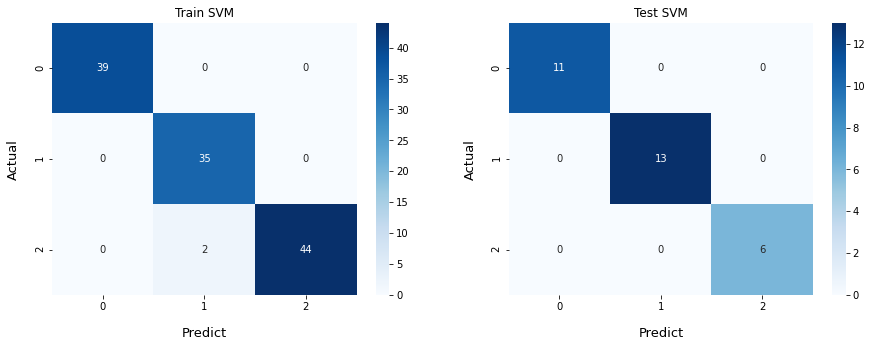

In [38]:
figure, axes = plt.subplots(1,2, figsize = (15,5), sharex = True)

axes[0].set_title('Train SVM')
ax_svm = sns.heatmap(cm_svm_train, annot = True, cmap = 'Blues', ax = axes[0])
ax_svm.set_xlabel('Predict', fontsize = 13, labelpad = 15)
ax_svm.set_ylabel('Actual', fontsize = 13, labelpad = 15)


axes[1].set_title('Test SVM')
ax_svm = sns.heatmap(cm_svm_test, annot = True,cmap = 'Blues', ax = axes[1])
ax_svm.set_xlabel('Predict', fontsize = 13, labelpad = 15)
ax_svm.set_ylabel('Actual', fontsize = 13, labelpad = 15)
plt.show()

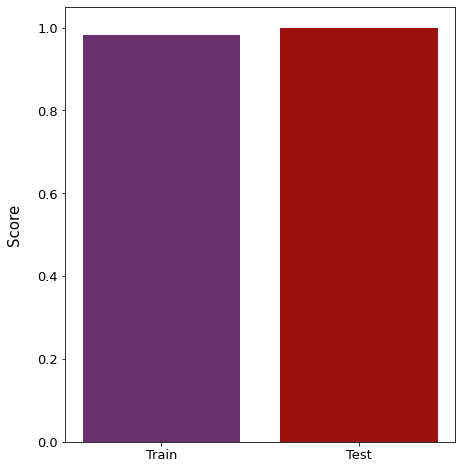

In [39]:
figure = plt.figure(figsize=(7,8))

plt.bar(['Train', 'Test'], [acc_train_svm, acc_test_svm], color = np.random.rand(3,3))
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.ylabel('Score', fontsize = 15, labelpad = 15)

plt.show()

# Actual Data

In [40]:
Test_Predict_Actual_Data = [[5.4, 3.0, 4.5, 1.5],
                            [6.0,2.2,5.0,1.5]]

In [41]:
print('Result of Decision Tree : {}'.format(model.predict(Test_Predict_Actual_Data)))
print('Reuslt of SVM : {}'.format(model_svm.predict(Test_Predict_Actual_Data)))

Result of Decision Tree : ['Iris-versicolor' 'Iris-virginica']
Reuslt of SVM : [1 2]


Dari hasil diatas maka dapat disimpulkan bahwa :
1. Data bersifat linear pada species 'Iris-Sentosa' dan species selain 'Iris-Sentosa' bersifat non-linear
2. Data bersifat balanced
3. Kinerja Decision Tree bersifat non-overfitting dan SVM bersifat sebaliknya dengan berdasarkan hasil acc train-test
4. SVM 'Linear' kurang cocok untuk melakukan data iris berdasarkan hasil diatas